# <font color = "darkmagenta">An analytical detective<font/>

## <font color = "darkcyan">Table of Content</font>
    
    

[Data Description](#Data-Description)


[Loading the Data](#Loading-the-Data)


[Understanding Dates](#Understanding-Dates)


[Visualising Crime Trends](#Visualising-Crime-Trends)


[Popular Locations](#Popular-Locations)


## <font color = "darkcyan"> Data Description </font>

Crime is an international concern, but it is documented and handled in very different ways in different countries. In the United States, violent crimes and property crimes are recorded by the Federal Bureau of Investigation (FBI).  Additionally, each city documents crime, and some cities release data regarding crime rates. The city of Chicago, Illinois releases crime data from 2001 onward [online](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

There are two main types of crimes: violent crimes, and property crimes. In this problem, we'll focus on one specific type of property crime, called "motor vehicle theft" (sometimes referred to as grand theft auto). This is the act of stealing, or attempting to steal, a car. In this problem, we'll use some basic data analysis in R to understand the motor vehicle thefts in Chicago. 

Please download the file `mvtWeek1.csv` for this problem (do not open this file in any spreadsheet software before completing this problem because it might change the format of the Date field). Here is a list of descriptions of the variables:

* **ID**: a unique identifier for each observation
* **Date**: the date the crime occurred
* **LocationDescription**: the location where the crime occurred
* **Arrest**: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)
* **Domestic**: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)
* **Beat**: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
* **District**: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
* **CommunityArea**: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.
* **Year**: the year in which the crime occurred.
* **Latitude**: the latitude of the location at which the crime occurred.
* **Longitude**: the longitude of the location at which the crime occurred.

## <font color = "darkcyan">Loading the Data</font>

In [1]:
import pandas as pd

mvt = pd.read_csv("../Data/mvtWeek1.csv", low_memory=False)

mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
Latitude               189365 non-null float64
Longitude              189365 non-null float64
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 13.5+ MB


How many rows of data (observations) are in this dataset?

How many variables are in this dataset?

In [2]:
mvt.shape

(191641, 11)

Variables are

In [3]:
mvt.columns

Index(['ID', 'Date', 'LocationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'CommunityArea', 'Year', 'Latitude', 'Longitude'],
      dtype='object')

Using the "max" function, what is the maximum value of the variable "ID"?

In [4]:
mvt["ID"].max()

9181151

What is the minimum value of the variable "Beat"?

In [5]:
mvt["Beat"].min()

111

How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?

In [6]:
mvt["Arrest"].value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

How many observations have a LocationDescription value of ALLEY?

In [7]:
(mvt["LocationDescription"] == "ALLEY").value_counts()

False    189333
True       2308
Name: LocationDescription, dtype: int64

## <font color = "darkcyan">Understanding Dates</font>

Take a look at the first entry of Date

In [8]:
mvt["Date"].head()

0    12/31/12 23:15
1    12/31/12 22:00
2    12/31/12 22:00
3    12/31/12 22:00
4    12/31/12 21:30
Name: Date, dtype: object

In what format are the entries in the variable Date?

In [9]:
mvt["Date"].dtype

dtype('O')

Convert to datetime object

In [10]:
mvt["Date"] = pd.to_datetime(mvt["Date"])

In [11]:
mvt["Date"].iloc[95820]

Timestamp('2006-05-21 12:30:00')

Now, let's extract the month and the day of the week, and add these variables to our data frame mvt.

In [12]:
# The month as January=1, December=12
mvt["Month"] = mvt["Date"].dt.month

# The day of the week with Monday=0, Sunday=6
mvt["Weekday"] = mvt["Date"].dt.weekday

mvt.loc[mvt["Weekday"] == 0, "Weekday"] = "Mon"
mvt.loc[mvt["Weekday"] == 1, "Weekday"] = "Tue"
mvt.loc[mvt["Weekday"] == 2, "Weekday"] = "Wed"
mvt.loc[mvt["Weekday"] == 3, "Weekday"] = "Thu"
mvt.loc[mvt["Weekday"] == 4, "Weekday"] = "Fri"
mvt.loc[mvt["Weekday"] == 5, "Weekday"] = "Sat"
mvt.loc[mvt["Weekday"] == 6, "Weekday"] = "Sun"

In which month did the fewest motor vehicle thefts occur?

In [13]:
mvt["Month"].value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

On which weekday did the most motor vehicle thefts occur?

In [14]:
mvt["Weekday"].value_counts()

Fri    29284
Wed    27416
Mon    27397
Thu    27319
Sat    27118
Tue    26791
Sun    26316
Name: Weekday, dtype: int64

Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [15]:
pd.crosstab(mvt["Arrest"], mvt["Month"] )

Month,1,2,3,4,5,6,7,8,9,10,11,12
Arrest,,,,,,,,,,,,
False,14612,12273,14460,14028,14848,14772,15477,15243,14812,15744,14807,15029
True,1435,1238,1298,1252,1187,1230,1324,1329,1248,1342,1256,1397


In [16]:
mvt1 = mvt[mvt["Arrest"]]
mvt1["Month"].value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

## <font color = "darkcyan">Visualising Crime Trends</font>

First, let's make a histogram of the variable Date.

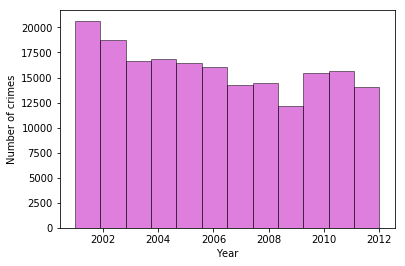

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

mvt["Year"].plot.hist(bins = 12, ec= "black", color = "m", alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("Number of crimes");

Create a boxplot of the variable `Year`, sorted by the variable `Arrest`

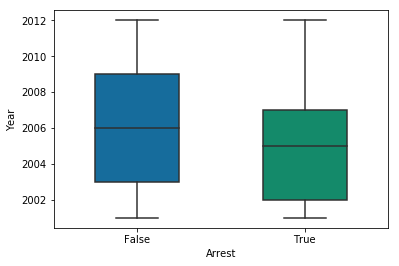

In [19]:
import seaborn as sns

sns.boxplot(y='Year', x='Arrest', 
                 data=mvt, 
                 width=0.5,
                 palette="colorblind");

For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [20]:
pd.crosstab(mvt["Arrest"], mvt["Year"][mvt["Year"] == 2001], normalize = True)

Year,2001.0
Arrest,
False,0.895883
True,0.104117


For what proportion of motor vehicle thefts in 2007 was an arrest made?


In [21]:
pd.crosstab(mvt["Arrest"], mvt["Year"][mvt["Year"] == 2007], normalize = True)

Year,2007.0
Arrest,
False,0.915126
True,0.084874


For what proportion of motor vehicle thefts in 2012 was an arrest made?

In [22]:
pd.crosstab(mvt["Arrest"], mvt["Year"][mvt["Year"] == 2012], normalize = True)

Year,2012.0
Arrest,
False,0.960971
True,0.039029


## <font color = "darkcyan">Popular Locations</font>

Analyzing this data could be useful to the Chicago Police Department when deciding where to allocate resources. If they want to increase the number of arrests that are made for motor vehicle thefts, where should they focus their efforts?

We want to find the top five locations excluding `Other` where motor vehicle thefts occur.

In [23]:
ind = mvt["LocationDescription"].value_counts()[0:6]

del ind["OTHER"]

ind

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5".

In [25]:
Top5 = mvt[mvt["LocationDescription"].isin(list(ind.index))]

In [26]:
Top5.shape

(177510, 13)

In [28]:
pd.crosstab(Top5["Arrest"], Top5["LocationDescription"])

LocationDescription,ALLEY,DRIVEWAY - RESIDENTIAL,GAS STATION,PARKING LOT/GARAGE(NON.RESID.),STREET
Arrest,,,,,
False,2059,1543,1672,13249,144969
True,249,132,439,1603,11595


On which day of the week do the most motor vehicle thefts at gas stations happen?



In [33]:
Top5[Top5["LocationDescription"] == "GAS STATION"]["Weekday"].value_counts()

Sat    338
Sun    336
Fri    332
Thu    282
Mon    280
Wed    273
Tue    270
Name: Weekday, dtype: int64